# Contour plot of the DPMIV results from UKB data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import seaborn as sns
import matplotlib.pyplot as plt
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects.numpy2ri
base = rpackages.importr('base', on_conflict="warn")

rpy2.robjects.numpy2ri.activate()

%matplotlib inline 

In [3]:
temp = pd.read_csv("female_last_result.txt", sep=" ")
temp = pd.read_csv("male_last_result.txt", sep=" ")
mu1 = np.array(temp['mu1'])
sig1 = np.array(temp['sig1']) 
mu2 = np.array(temp['mu2'])
sig2 = np.array(temp['sig2'])
rho = temp['rho']; n = temp['n']
temp.head()

,mu1,sig1,mu2,sig2,rho,n
0,4.985759,0.015368,5.511205,0.966011,0.076518,13538
1,4.985335,0.024389,2.370449,0.177256,-0.051549,327
2,4.830351,0.103979,5.265445,0.255939,0.878950,16
3,4.983990,0.083541,5.128341,0.633218,0.484893,43
4,4.924593,0.055028,3.700169,2.264223,0.670181,9


In [4]:
nx = 100; ny = 100
scale = 2
x = np.linspace(mu1.min() - scale * sig1.max(), mu1.max() + scale * sig1.max(), nx)
y = np.linspace(mu2.min() - scale * sig2.max(), mu2.max() + scale * sig2.max(), ny)
#x = np.linspace(4.7, 5.5, nx)
#y = np.linspace(4, 9, ny)

xv, yv = np.meshgrid(x, y)
data = np.array([[a,b] for a,b in base.expand_grid(x, y)])
result = np.zeros((len(data), 1))

cov1 = np.sqrt(sig1*sig2)*rho
for i in range(len(data)):
    if i % 300 == 0:
        print(i)
    for j in range(len(temp)):
        Mu = np.array([mu1[j],mu2[j]])
        Sigma = np.array([[sig1[j], cov1[j]], [cov1[j], sig2[j]]])
        result[i] += multivariate_normal.pdf(x=[data[i, 0], data[i, 1]], mean = Mu, cov = Sigma) * n[j]

0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900


# Plot the contour

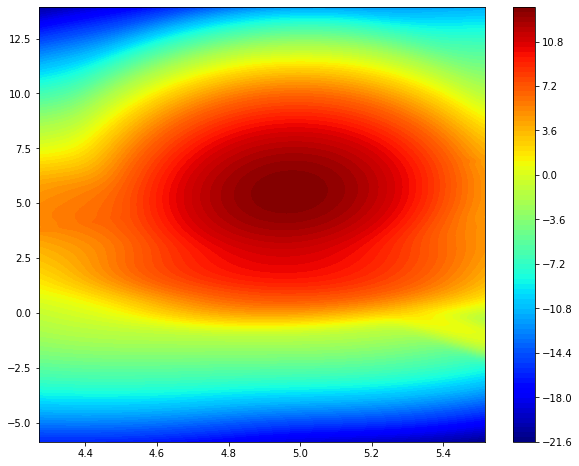

In [20]:
plt.figure(figsize=(10, 8))
plt.contourf(xv, yv, np.log(result.reshape((ny, nx)))/sum(n), levels=100, cmap="jet", alpha=1)
#plt.ylim(2.5, 8)
#plt.xlim(4.6, 5.25)
plt.colorbar()
plt.show()